<a href="https://colab.research.google.com/github/dpert-cmu/dpert-cmu/blob/main/GaussianProcess_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes

---

## Bivariate Gaussian Distribution

Bivariate Gaussian Distribution is gaussian distribution is two dimensions.

In general, multivairate normal distribution $X$ of dimension $k$ can be defined as,

$$
\begin{align*}
X \sim \mathcal{N_k}\left(\mu, \Sigma\right)
\end{align*}
$$

where

$$
\begin{align*}
\text{Mean Vector } (\mu) &\in \mathbb{R}^{k} \\
\text{Covariance Matrix } (\Sigma) &\in \mathbb{R}^{k \times k}
\end{align*}
$$

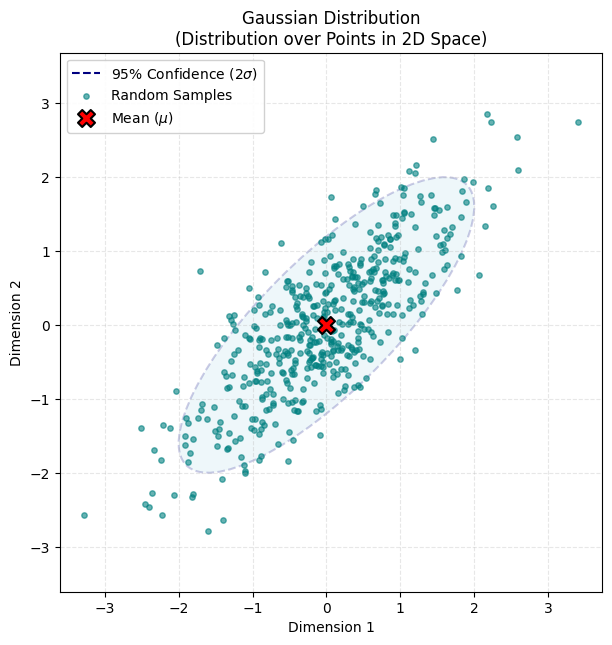

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

PLOT_THEME = 'Light'
#PLOT_THEME = 'Dark'

if PLOT_THEME == 'Light':
    plt.style.use('default')
else:
    plt.style.use('dark_background')

def Plot_Confidence_Region(mu, cov, ax, n_std=2.0, facecolor='none', **kwargs):
    """
        Draws Confidence Region Based upon a Mean Vector and a Covariance Matrix
    """
    # Calculate Eigenvalues and Eigenvectors
    vals, vecs = np.linalg.eigh(cov)

    # Calculate the Angle of Rotation
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Calculate Width and Height
    width, height = 2 * n_std * np.sqrt(vals)

    # Create and Add the Ellipse
    ellipse = Ellipse(xy=(mu[0], mu[1]), width=width, height=height, angle=theta, facecolor=facecolor, **kwargs)

    return ax.add_patch(ellipse)

#-----------------------------------------------------------------------------------#
# TODO: Try Changing the mean vector and covariance matrix to see how it affects plot
#-----------------------------------------------------------------------------------#

# Mean Vector
mu_vector = np.array([0, 0])

# Covariance Matrix
cov_matrix = np.array([ [1.0, 0.8],
                        [0.8, 1.0]])

#-----------------------------------------------------------------------------------#

# Generate 200 samples
np.random.seed(42)
samples = np.random.multivariate_normal(mu_vector, cov_matrix, 500)

# Plotting
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the Confidence Ellipse (Uncertainty)
if PLOT_THEME == 'Light':
    Plot_Confidence_Region(mu_vector, cov_matrix, ax, n_std=2.0, facecolor='lightblue', alpha=0.2, edgecolor='navy', linestyle='--', lw=1.5)
    ax.plot([], [], color='navy', linestyle='--', label=r"95% Confidence ($2\sigma$)")
else:
    Plot_Confidence_Region(mu_vector, cov_matrix, ax, n_std=2.0, facecolor='lightblue', alpha=0.2, edgecolor='#00ff7f', linestyle='-.', lw=1.5)
    ax.plot([], [], color='#00ff7f', linestyle='--', label=r"95% Confidence ($2\sigma$)")

# Plot the Samples
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.6, c='teal', s=15, label="Random Samples")

# Plot the Mean
if PLOT_THEME == 'Light':
    ax.scatter(mu_vector[0], mu_vector[1], c='red', s=150, marker='X', edgecolors='black', linewidth=1.5, zorder=10, label=r"Mean ($\mu$)")
else:
    ax.scatter(mu_vector[0], mu_vector[1], c='red', s=150, marker='X', edgecolors='white', linewidth=1.5, zorder=10, label=r"Mean ($\mu$)")

ax.set_title("Gaussian Distribution\n(Distribution over Points in 2D Space)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.axis('equal')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', framealpha=0.9)

plt.show()

## Gaussian Process: Distribution of Functions

A Gaussian Process (GP) is an extension of the Multivariate Normal distribution to infinite dimensions. Instead of defining a distribution over vectors, a GP defines a distribution over **functions**.

A function $f(x)$ is distributed as a Gaussian Process:

$$
\begin{align*}
f(x) \sim \mathcal{GP}\left(m(x), k(x, x')\right)
\end{align*}
$$

$$
\begin{align*}
\text{Mean Function } &- m(x) \\
\text{Covariance Function } &- k(x, x')
\end{align*}
$$

**Key Property:**
A GP is formally defined such that for any finite set of points $\{x_1, \dots, x_n\}$, the function values form a Multivariate Normal distribution:

$$\mathbf{f} \sim \mathcal{N}(\mathbf{m}, \mathbf{K})$$

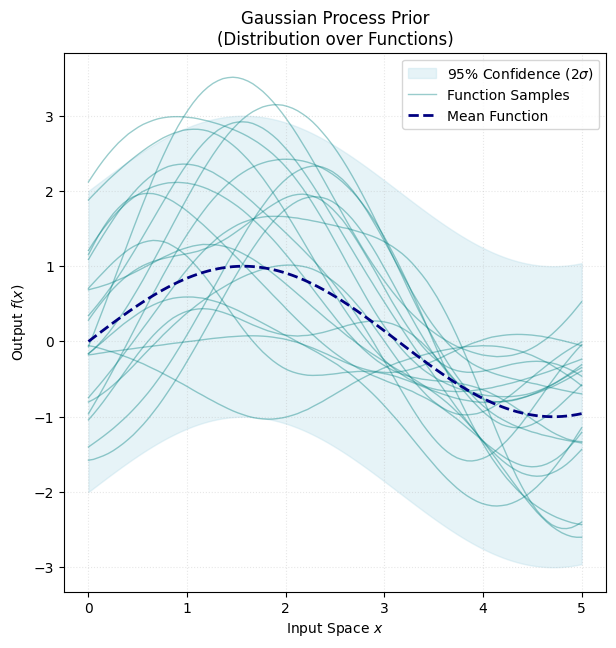

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mean Functions
# Constant Mean Function
def Constant_Mean(x):
    return np.zeros_like(x)

# Linear Mean Function
def Linear_Mean(x, slope=0.5, intercept=0.0):
    return slope * x + intercept

# Sinusoidal Mean Function
def Sinusoidal_Mean(x, amplitude=1.0, frequency=1.0):
    return amplitude * np.sin(frequency * x)

# Covariance Functions
# Radial Basis Function/Squared Exponential Kernel
def Radial_Basis_Function(x1, x2, length_scale=1.0):
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return np.exp(-0.5 * sqdist / length_scale**2)

# Periodic Kernel
def Periodic_Kernel(x1, x2, length_scale=1.0, period=2.0):
    dist = np.abs(x1 - x2.T)
    return np.exp( -2 * (np.sin(np.pi * dist / period)**2) / length_scale**2 )

# Brownian Motion Kernel
def Brownian_Kernel(x1, x2):
    return np.minimum(x1, x2.T)

# Setup Domain
X = np.linspace(0, 5, 100).reshape(-1, 1)

#----------------------------------------------------------------------------------------#
# TODO: Try Changing the mean function and covariance function to see how it affects plot
#----------------------------------------------------------------------------------------#
# TODO: Select your Mean Function
# Mean_Func = Constant_Mean
# Mean_Func = Linear_Mean
Mean_Func = Sinusoidal_Mean

# TODO: Select your Covariance Function
Cov_Func = Radial_Basis_Function
# Cov_Func = Periodic_Kernel
# Cov_Func = Brownian_Kernel
#----------------------------------------------------------------------------------------#

# Compute Mean Vector and Covariance Matrix from our Functions
mu_vec = Mean_Func(X).flatten()
cov_mat = Cov_Func(X, X)

# Add a small value to diagonal for numerical stability
cov_mat += 1e-6 * np.eye(len(X))

# Draw 10 function samples from the multivariate normal
samples = np.random.multivariate_normal(mu_vec, cov_mat, 20)

# Calculate Uncertainty
variance = np.diag(cov_mat)
std_dev = np.sqrt(variance)

# Plotting
plt.figure(figsize=(7, 7))

# Plot the Uncertainty Bounds
plt.fill_between(X.flatten(), mu_vec - 2*std_dev, mu_vec + 2*std_dev, color='lightblue', alpha=0.3, label=r"95% Confidence (2$\sigma$)")

# Plot the Sample Functions
if PLOT_THEME == 'Light':
    plt.plot(X, samples[0], lw=1, color='teal', alpha=0.4, label="Function Samples")
    plt.plot(X, samples[1:].T, lw=1, color='teal', alpha=0.4)
else:
    plt.plot(X, samples[0], lw=1, color='#00ff7f', alpha=0.4, label="Function Samples")
    plt.plot(X, samples[1:].T, lw=1, color='#00ff7f', alpha=0.4)

# Plot the Mean Function
if PLOT_THEME == 'Light':
    plt.plot(X, mu_vec, lw=2, color='navy', linestyle='--', label="Mean Function")
else:
    plt.plot(X, mu_vec, lw=2, color='white', linestyle='--', label="Posterior Mean")

# Formatting
plt.title("Gaussian Process Prior\n(Distribution over Functions)")
plt.xlabel(r"Input Space $x$")
plt.ylabel(r"Output $f(x)$")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, linestyle=':')
plt.show()

## Components of Gaussian Process

### Mean Function

**Mean Function** $m(x)$: The "average" shape of the function.
   $$m(x) = \mathbb{E}[f(x)]$$

- This function acts as the prediction of the Gaussian Process.
- So the function chosen should resemble the global trend of the dataset.

<p align="center">
    <img src="https://github.com/TorresCMULab/Pytorch_and_GPyTorch_Examples/blob/main/assets/gp_mean_function_light.gif?raw=1" width="70%" />
    <br>
    <em>GIF 1: How setting a different Mean Functions changes the nature of the GP prediction.</em>
</p>

### Covariance Function

**Covariance Function (Kernel)** $k(x, x')$: The similarity between two points.
   $$k(x, x') = \mathbb{E}\left[(f(x) - m(x))(f(x') - m(x'))\right]$$

- This function capture local features of the dataset.
- Assumptions associated with kernel function should match the dataset.

<p align="center">
    <img src="https://github.com/TorresCMULab/Pytorch_and_GPyTorch_Examples/blob/main/assets/gp_covariance_comparison_light.gif?raw=1" width="70%" />
    <br>
    <em>GIF 2: How the Kernel choice dictates the texture and periodicity of the function.</em>
</p>

### Underlying Optimization Problem

While training a Gaussian Process we solve a log likelihood maximization problem.

- Objective Function
  - **Data fit** - The term measures how well the model fits the predictions. If the fit is poor the value of the term is larger.

  - **Complexity Penalty** - Measure of volume/samples of basis functions with chose hyper parameter fit the data. If the number is of functions that can be sampled is small the log of that number is larger. Prevents overfitting.

$$
\begin{align*}
\log p(\mathbf{y} \mid X, \theta) = - \frac{1}{2} \left( \underbrace{\mathbf{y}^T (K_\theta + \sigma_n^2 I)^{-1} \mathbf{y}}_{\text{Data Fit}} + \underbrace{ \log |K_\theta + \sigma_n^2 I|}_{\text{Complexity Penalty}} + n \log 2\pi \right)
\end{align*}
$$


- Decision Variables

$$
\begin{align*}
\theta &- \text{Parameters of the kernel function (length scale, amplitude, smoothness parameter etc).}\\
\sigma_n &- \text{Gaussian Noise parameter.}
\end{align*}
$$

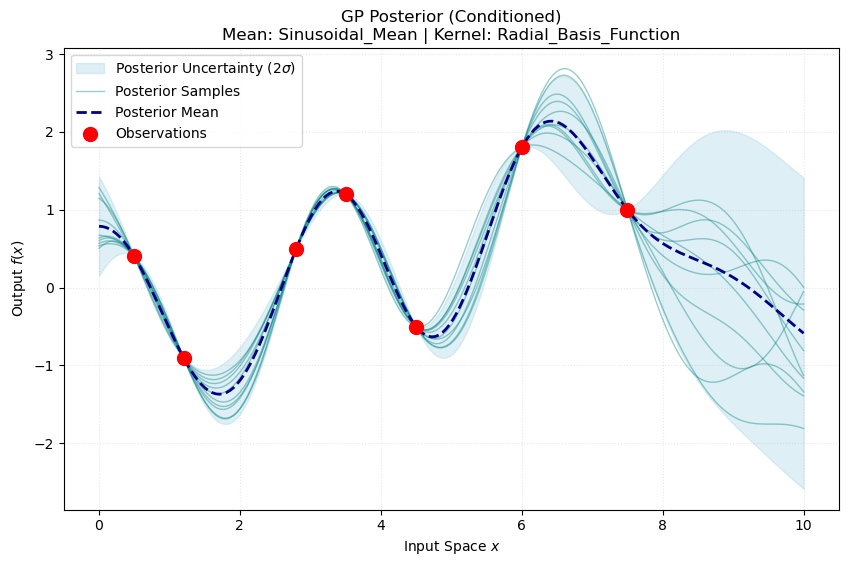

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain of predictions
X_test = np.linspace(0, 10, 200).reshape(-1, 1)

# Sample Training Data
X_train = np.array([0.5, 1.2, 2.8, 3.5, 4.5, 6.0, 7.5]).reshape(-1, 1)
y_train = np.array([0.4, -0.9, 0.5, 1.2, -0.5, 1.8, 1.0]).reshape(-1, 1)

# Compute Kernel Matrices
K_train = Cov_Func(X_train, X_train)
K_test  = Cov_Func(X_test, X_test)
K_cross = Cov_Func(X_train, X_test)

# Compute Prior Mean Vectors
m_train = Mean_Func(X_train)
m_test  = Mean_Func(X_test)

# Compute Inverse (with jitter for stability)
K_inv = np.linalg.inv(K_train + 1e-6 * np.eye(len(X_train)))

# Posterior Mean Equation
# Formula: m(x*) + K*^T @ K^-1 @ (y - m(x))
# Meaning: Base Trend + [Correlation Correction based on errors]
mu_post = m_test + K_cross.T @ K_inv @ (y_train - m_train)

# Posterior Covariance Equation
# Formula: K** - K*^T @ K^-1 @ K*
cov_post = K_test - K_cross.T @ K_inv @ K_cross

# Draw samples from the posterior
samples = np.random.multivariate_normal(mu_post.flatten(), cov_post, 10)

# Extract uncertainty
std_dev = np.sqrt(np.diag(cov_post))

# Plotting
plt.figure(figsize=(10, 6))

# Uncertainty Bounds
plt.fill_between(X_test.flatten(), (mu_post.flatten() - 2*std_dev), (mu_post.flatten() + 2*std_dev), color='lightblue', alpha=0.4, label=r"Posterior Uncertainty (2$\sigma$)")

# Posterior Samples
if PLOT_THEME == 'Light':
    plt.plot(X_test, samples[0], lw=1, color='teal', alpha=0.4, label="Posterior Samples")
    plt.plot(X_test, samples[1:].T, lw=1, color='teal', alpha=0.4)
else:
    plt.plot(X_test, samples[0], lw=1, color='#00ff7f', alpha=0.4, label="Posterior Samples")
    plt.plot(X_test, samples[1:].T, lw=1, color='#00ff7f', alpha=0.4)

# Posterior Mean
if PLOT_THEME == 'Light':
    plt.plot(X_test, mu_post, lw=2, color='navy', linestyle='--', label="Posterior Mean")
else:
    plt.plot(X_test, mu_post, lw=2, color='white', linestyle='--', label="Posterior Mean")

# Observations
plt.scatter(X_train, y_train, color='red', s=100, zorder=10, label="Observations")

# Formatting
plt.title(f"GP Posterior (Conditioned)\nMean: {Mean_Func.__name__} | Kernel: {Cov_Func.__name__}")
plt.xlabel(r"Input Space $x$")
plt.ylabel(r"Output $f(x)$")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, linestyle=':')
plt.show()

# PyTorch and GPyTorch

---

[Pytorch](https://docs.pytorch.org/docs/stable/index.html) is an open-source optimized tensor library for deep learning using CPU and GPUs. Visit the website for documentation about APIs.

[GPyTorch](https://gpytorch.ai/) is a highly efficient and modular implementation of GPs with GPU acceleration implementent in PyTorch. For more information regarding numerical techniques used for implementation refer to this [paper](https://arxiv.org/pdf/1809.11165.pdf). Visit the [website](https://docs.gpytorch.ai/en/stable/) for detailed documentation.

### Check if GPyTorch is installed, if not, install it (For Google Colab Users Only)

---

In [ ]:
try:
    import gpytorch
    print("GPyTorch is already installed!")
except ImportError:
    print("Installing GPyTorch...")
    %pip install gpytorch

## 1. Synthetic Data Generation and Pre Processing

### 1.1 Data Generation

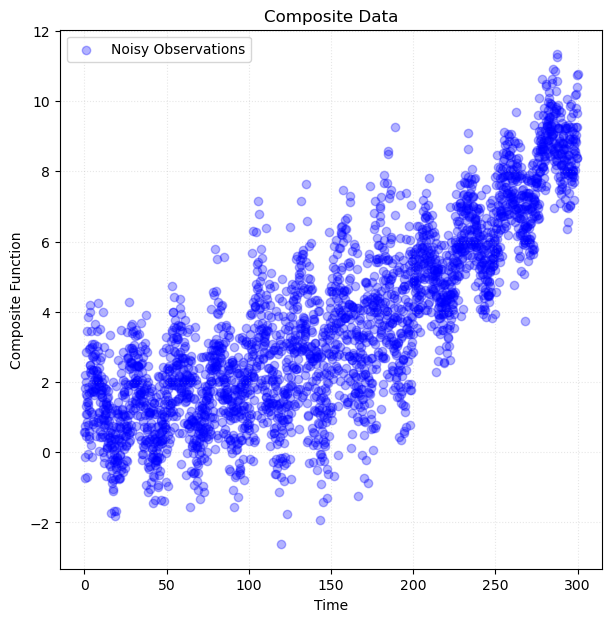

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dataset_size = 3000
breakpoint_1 = dataset_size//3
breakpoint_2 = 2*(dataset_size//3)

time = np.linspace(0, 300, dataset_size)

#------------------------------------------------------------------------------------#
# ToDo: Select Types of Data
#------------------------------------------------------------------------------------#

#------------------------------------------------------------------------------------#
# Dataset 1: Exponential Sinusoid
#------------------------------------------------------------------------------------#
exp_func = np.exp(0.0075*time)
sine_func = np.sin(0.25*time)
comp_func = exp_func + sine_func

slice_1 = comp_func[:breakpoint_1] + np.random.normal(0, 1, (dataset_size//3))
slice_2 = comp_func[breakpoint_1:breakpoint_2] + np.random.normal(0, 1.5, (dataset_size//3))
slice_3 = comp_func[breakpoint_2:] + np.random.normal(0, 0.8, (dataset_size//3))

#------------------------------------------------------------------------------------#
# Dataset 2:  Linear Growth + Long smooth wobble
#------------------------------------------------------------------------------------#
#linear_func = 0.05 * time
#smooth_wave = np.sin(0.1 * time) * 5
#comp_func = linear_func + smooth_wave

#slice_1 = comp_func[:breakpoint_1] + np.random.normal(0, 1.0, (dataset_size//3))
#slice_2 = comp_func[breakpoint_1:breakpoint_2] + np.random.normal(0, 1.0, (dataset_size//3))
#slice_3 = comp_func[breakpoint_2:] + np.random.normal(0, 1.0, (dataset_size//3))

noisy_comp_func = np.concatenate((slice_1, slice_2, slice_3))

# Plotting
plt.figure(figsize=(7, 7))
if PLOT_THEME == 'Light':
    plt.scatter(time, noisy_comp_func, alpha=0.3, c='blue', label="Noisy Observations")
else:
    plt.scatter(time, noisy_comp_func, alpha=0.3, c='cyan', label="Noisy Observations")

plt.xlabel("Time")
plt.ylabel("Composite Function")
plt.title(f"Composite Data")
plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper left')
plt.show()


### 1.2 Pre Processing

In [ ]:
# Scaling data using inbuilt function
from sklearn.preprocessing import StandardScaler

# Scaling X axis
time_scaler = StandardScaler()
time_scaler.fit(time.reshape(-1,1))
time = time_scaler.transform(time.reshape(-1,1)).flatten()

# Scaling Y axis
y_scaler = StandardScaler()
y_scaler.fit(noisy_comp_func.reshape(-1,1))
noisy_comp_func = y_scaler.transform(noisy_comp_func.reshape(-1,1)).flatten()

# Train and Test Split
Train_split = 0.75
Train_Dataset = int(Train_split*len(time))

# Splitting data into training and testing sets
train_x = time[:Train_Dataset]
train_y = noisy_comp_func[:Train_Dataset]
test_x = time[Train_Dataset:]
test_y = noisy_comp_func[Train_Dataset:]

## 2. Defining Gaussian Process

### 2.1 Model Definition

In GPyTorch, models are defined as Python classes that inherit from a base GP class. This structure follows a standard PyTorch module pattern but specifically handles Gaussian distributions.

#### 2.1.1 Inheritance
The class typically inherits from `gpytorch.models.ExactGP`.
* **Purpose:** Handles exact inference (calculating the true posterior) using Cholesky decomposition. This is the standard for datasets $<10,000$ points.
* **Alternatives:**
    * `ApproximateGP`: Used for large datasets (Variational Inference) or non-Gaussian likelihoods (Classification).

#### 2.1.2. The Constructor (`__init__`)
This method initializes the model parameters. You must call `super().__init__` to register the training data and likelihood.
* **Mean Module (`self.mean_module`):** Defines the "baseline" trend of the data (e.g., is it flat? is it drifting up?).
* **Covariance Module (`self.covar_module`):** Defines the "kernel" or how points relate to each other (smoothness, periodicity, jaggedness).
    * *Note:* Kernels can be composed. In Model 1 above, `periodic_kernel + trend_kernel` tells the model the data has **both** repeating patterns and a smooth background trend.

#### 2.1.3. The `forward` Method
This defines how the model computes the **Prior** distribution for a given input `x`.
* **Input:** Takes a tensor `x` (locations).
* **Output:** Returns a `gpytorch.distributions.MultivariateNormal`.
* **Under the Hood (Autograd):** As this method runs, PyTorch implicitly constructs a dynamic **Directed Acyclic Graph (DAG)** of tensor operations. This graph records the history of computations, which allows the optimizer to later traverse it backwards (Automatic Differentiation) to calculate gradients for hyperparameter tuning.

| Category | Class Name in `gpytorch` | Typical Use Case |
| :--- | :--- | :--- |
| **Mean** | `means.ZeroMean` | Data is centered/normalized around 0 (Standard default). |
| | `means.ConstantMean` | Data has a non-zero offset, but no direction. |
| | `means.LinearMean` | Data has a clear upward or downward drift (e.g., Model 1 & 2). |
| **Kernel** | `kernels.RBFKernel` | "Radial Basis Function". Smooth, curving data. The "default" choice. |
| | `kernels.MaternKernel` | Rugged, non-smooth data. Handles sharp changes better than RBF. |
| | `kernels.PeriodicKernel` | Strictly repeating patterns (seasons, heartbeats). |
| | `kernels.LinearKernel` | Purely linear relationships (standard linear regression). |
| | `kernels.ScaleKernel` | **Crucial Wrapper.** Adds an "Amplitude" parameter to any kernel (e.g., allows the wave to be tall or short). |


In [ ]:
import torch
import gpytorch as gpyt

#------------------------------------------------------------------------------------#
# Model 1: For Dataset 1 Mean: Linear, Kernel: Periodic + RBF
#------------------------------------------------------------------------------------#
class GaussianProcess(gpyt.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpyt.means.LinearMean(input_size=1)
        periodic_kernel = gpyt.kernels.ScaleKernel(gpyt.kernels.PeriodicKernel())
        trend_kernel = gpyt.kernels.ScaleKernel(gpyt.kernels.RBFKernel())
        self.covar_module = periodic_kernel + trend_kernel

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpyt.distributions.MultivariateNormal(mean_x, covar_x)

#------------------------------------------------------------------------------------#
# Model 2: For Dataset 2 Mean: Linear, Kernel: Periodic
#------------------------------------------------------------------------------------#
class TrendGP(gpyt.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpyt.means.LinearMean(input_size=1)
        self.covar_module = gpyt.kernels.ScaleKernel(gpyt.kernels.PeriodicKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpyt.distributions.MultivariateNormal(mean_x, covar_x)


### 2.2 Defining Model Parameters

#### 2.2.1. Likelihood (`Likelihood`)
The likelihood handles the "noise" in your data. Adds noise to the smooth mathematical function the GP predicts.
* **Current Choice:** `gpyt.likelihoods.GaussianLikelihood()`
* **Purpose:** Assumes your data has standard white noise ($\epsilon \sim \mathcal{N}(0, \sigma^2)$). It learns the noise parameter $\sigma_n$ during training.

| Likelihood Class | Typical Use Case |
| :--- | :--- |
| `GaussianLikelihood` | Standard Regression (continuous outputs). |
| `BernoulliLikelihood` | Binary Classification (0 or 1 outputs). |
| `FixedNoiseGaussianLikelihood` | Regression where you *already know* the noise variance for each point (e.g., from instrument error bars). |
| `StudentTLikelihood` | Robust regression (less sensitive to outliers than Gaussian). |

#### 2.2.2. Optimizer (`Optimizer`)
This is the standard PyTorch engine that updates the parameters. Since GPyTorch models are just PyTorch modules, we use the same optimizers.
* **Current Choice:** `torch.optim.Adam`
* **Purpose:** Performs gradient descent to calculated the kernel parameters (lengthscale, noise, etc.) to reduce the loss during `loss.backward()`.

| Optimizer Class | Typical Use Case |
| :--- | :--- |
| `optim.Adam` | The default for most Deep Learning/GP tasks. Robust and requires little tuning. |
| `optim.SGD` | Stochastic Gradient Descent. Used if Adam fails to converge or for specific fine-tuning. |
| `optim.LBFGS` | A "Second-order" optimizer. Often **better for Exact GPs** on small datasets as it converges faster and more precisely, but harder to use. |

#### 2.2.3. Loss Function (`MLL`)
This is the "Objective Function" we discussed earlier.
* **Current Choice:** `gpyt.mlls.ExactMarginalLogLikelihood`
* **Purpose:** It calculates the probability of the data given the model. We minimize the *negative* of this value. It strictly works with `ExactGP` models.

| Loss Function Class | Typical Use Case |
| :--- | :--- |
| `mlls.ExactMarginalLogLikelihood` | Used for `ExactGP` on small/medium datasets. |
| `mlls.VariationalELBO` | Used for **Approximate GPs** where exact MLL is too slow to compute. |
| `mlls.PredictiveLogLikelihood` | Used when you care more about predictive capability on a validation set than fitting the training data. |

In [ ]:
# Parameter for Selecting GPU
GPU = 0

# Setting CPU or GPU according to availbility
device = "cuda" if GPU == 1 and torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Converting numpy arrays to Tensors and deploying to device
train_x = torch.from_numpy(train_x).float().to(device)
train_y = torch.from_numpy(train_y).float().to(device)
test_x = torch.from_numpy(test_x).float().to(device)
test_y = torch.from_numpy(test_y).float().to(device)

# Selecting Likelihood
Likelihood = gpyt.likelihoods.GaussianLikelihood()

#--------------------------------------------------------------------#
# ToDo: Select Model Based on Dataset
#--------------------------------------------------------------------#
# Creating Instance of Model
GP = GaussianProcess(train_x, train_y, Likelihood).to(device)
#GP = TrendGP(train_x, train_y, Likelihood).to(device)

# Defining Optimizer
Optimizer = torch.optim.Adam(GP.parameters(), lr=0.1)

# Defining Loss Function
MLL = gpyt.mlls.ExactMarginalLogLikelihood(Likelihood, GP)

Using cpu device


## 3. Training Model

### 3.1 Intuition

<p align="center">
    <img src="https://github.com/TorresCMULab/Pytorch_and_GPyTorch_Examples/blob/main/assets/GP_evolution_light.gif?raw=1" width="70%" />
    <br>
    <em>GIF 3: Posterior sample, mean function and uncertainity bound update along with training.</em>
</p>

### 3.2 Training Loop

Iter 10/60 - Loss: 0.708
  - likelihood.noise_covar.raw_noise: -0.897
  - mean_module.weights: 0.498
  - mean_module.bias: -0.030
  - covar_module.kernels.0.raw_outputscale: -0.869
  - covar_module.kernels.0.base_kernel.raw_lengthscale: 0.857
  - covar_module.kernels.0.base_kernel.raw_period_length: -0.242
  - covar_module.kernels.1.raw_outputscale: -0.873
  - covar_module.kernels.1.base_kernel.raw_lengthscale: 0.777
Iter 20/60 - Loss: 0.677
  - likelihood.noise_covar.raw_noise: -1.647
  - mean_module.weights: 0.683
  - mean_module.bias: 0.355
  - covar_module.kernels.0.raw_outputscale: -1.326
  - covar_module.kernels.0.base_kernel.raw_lengthscale: 1.366
  - covar_module.kernels.0.base_kernel.raw_period_length: -0.226
  - covar_module.kernels.1.raw_outputscale: -1.715
  - covar_module.kernels.1.base_kernel.raw_lengthscale: 1.573
Iter 30/60 - Loss: 0.663
  - likelihood.noise_covar.raw_noise: -1.530
  - mean_module.weights: 0.744
  - mean_module.bias: 0.296
  - covar_module.kernels.0.raw

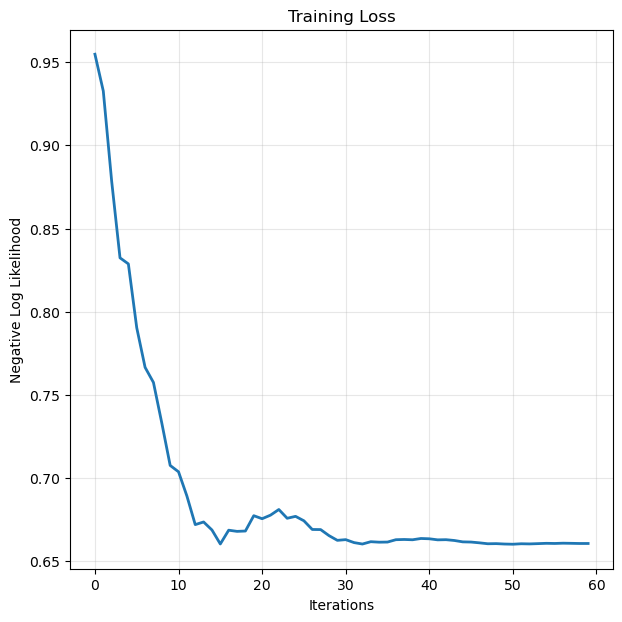

In [ ]:
# Enable Trainig Mode
GP.train()
Likelihood.train()

# Training Iteraions
Train_Iter = 60

# List to store losses
losses = []
Train_It_Arr = np.arange(0, Train_Iter, 1)

# Print Frequency
Print_Freq = 10

# Training Loop
for i in range(Train_Iter):

    # Zero gradients from previous iteration
    Optimizer.zero_grad()

    # Output from model
    output = GP(train_x)

    # Calc loss and gradients
    loss = -MLL(output, train_y)
    loss.backward()

    if (i + 1) % Print_Freq == 0:

        print(f"Iter {i+1}/{Train_Iter} - Loss: {loss.item():.3f}")

        # This loop prints all parameter found in the model automatically
        for name, param in GP.named_parameters():

            if param.requires_grad:
                print(f"  - {name}: {param.item():.3f}")

    # Perform gradient descent
    Optimizer.step()

    # Store loss
    losses.append(loss.item())

# Plot Loss Curve
plt.figure(figsize=(7, 7))

# Plot Loss Curve
if PLOT_THEME == 'Light':
    plt.plot(Train_It_Arr, losses, color='tab:blue', linewidth=2, label='Loss')
else:
    plt.plot(Train_It_Arr, losses, color='cyan', linewidth=2, label='Loss')

plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Negative Log Likelihood")
plt.grid(True, alpha=0.3)
plt.show()


## 4. Evaluating Model


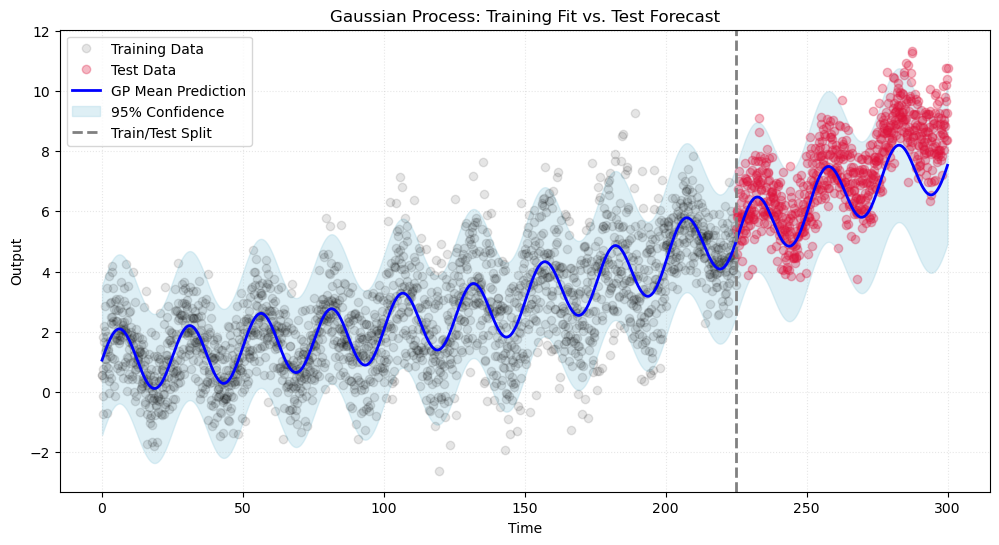

In [ ]:
def to_numpy_unscaled(tensor, scaler):
    """Function to Unscale values and convert Tensor to Numpy Array"""
    return scaler.inverse_transform(tensor.cpu().numpy().reshape(-1, 1)).flatten()

# Concatenate Train and Test inputs to predict a continuous timeline
full_x = torch.cat([train_x, test_x])

# Enable Evaluation Mode
GP.eval()
Likelihood.eval()

# Prediction
with torch.no_grad(), gpyt.settings.fast_pred_var():

    # Predict on the combined dataset
    observed_pred = Likelihood(GP(full_x))

    # Get Mean and Confidence Region
    mean = observed_pred.mean
    lower, upper = observed_pred.confidence_region()

# Unscale Inputs
full_x_unscaled = to_numpy_unscaled(full_x, time_scaler)
train_x_unscaled = to_numpy_unscaled(train_x, time_scaler)
test_x_unscaled = to_numpy_unscaled(test_x, time_scaler)

# Unscale Predictions
mean_unscaled = to_numpy_unscaled(mean, y_scaler)
lower_unscaled = to_numpy_unscaled(lower, y_scaler)
upper_unscaled = to_numpy_unscaled(upper, y_scaler)

# Unscale Observations
train_y_unscaled = to_numpy_unscaled(train_y, y_scaler)
test_y_unscaled = to_numpy_unscaled(test_y, y_scaler)

if PLOT_THEME == 'Dark':
    col_train = 'white'
    col_test = '#ff4d4d'
    col_mean = 'cyan'
    col_fill = 'cyan'
    col_split = 'white'
else:
    col_train = 'black'
    col_test = 'crimson'
    col_mean = 'blue'
    col_fill = 'lightblue'
    col_split = 'gray'

# Plotting
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train_x_unscaled, train_y_unscaled, 'o', color=col_train, alpha=0.1, label='Training Data')

# Plot Test Data
plt.plot(test_x_unscaled, test_y_unscaled, 'o', color=col_test, alpha=0.3, label='Test Data')

# Plot GP Mean Prediction
plt.plot(full_x_unscaled, mean_unscaled, color=col_mean, linewidth=2, label='GP Mean Prediction')

# Plot Uncertainty
plt.fill_between(full_x_unscaled, lower_unscaled, upper_unscaled, color=col_fill, alpha=0.4, label='95% Confidence')

# Vertical Split Line
split_time = train_x_unscaled[-1]
plt.axvline(x=split_time, color=col_split, linestyle='--', linewidth=2, label='Train/Test Split')

# Formatting
plt.xlabel("Time")
plt.ylabel("Output")
plt.title(f"Gaussian Process: Training Fit vs. Test Forecast")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, linestyle=':')

plt.show()